In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astropy.io import fits 

In [2]:
import glob
files = glob.glob('../data/hip67522/CHEOPS-products-*/Outdata/00000/hip67522_CHEOPS-products-*_im.fits')
files

['../data/hip67522/CHEOPS-products-20240319122713/Outdata/00000/hip67522_CHEOPS-products-20240319122713_im.fits',
 '../data/hip67522/CHEOPS-products-20240603073928/Outdata/00000/hip67522_CHEOPS-products-20240603073928_im.fits',
 '../data/hip67522/CHEOPS-products-20240522113135/Outdata/00000/hip67522_CHEOPS-products-20240522113135_im.fits',
 '../data/hip67522/CHEOPS-products-20240412070023/Outdata/00000/hip67522_CHEOPS-products-20240412070023_im.fits',
 '../data/hip67522/CHEOPS-products-20240311145359/Outdata/00000/hip67522_CHEOPS-products-20240311145359_im.fits',
 '../data/hip67522/CHEOPS-products-20240312075007/Outdata/00000/hip67522_CHEOPS-products-20240312075007_im.fits',
 '../data/hip67522/CHEOPS-products-20240529072301/Outdata/00000/hip67522_CHEOPS-products-20240529072301_im.fits',
 '../data/hip67522/CHEOPS-products-20240622064513/Outdata/00000/hip67522_CHEOPS-products-20240622064513_im.fits',
 '../data/hip67522/CHEOPS-products-20240325102059/Outdata/00000/hip67522_CHEOPS-products

In [52]:
cheops_phases = np.array([])
midpoint = 2460392.61598
period = 6.959503
# period = 1.44
offs =0
plt.figure(figsize=(6,14))

time = np.array([])
flux = np.array([])

for file in files:
    hdulist = fits.open(file)


    # get the image data
    image_data = hdulist[1].data

    t, f, ferr, roll = image_data["MJD_TIME"], image_data["FLUX"], image_data["FLUXERR"], image_data["ROLL"]

    # make sure the data is in fact 10s cadence
    assert np.diff(t).min() * 24 * 60 * 60 < 10.05, "Time series is not 10s cadence"

    # big endian to little endian
    t = t.byteswap().newbyteorder()
    f = f.byteswap().newbyteorder()
    ferr = ferr.byteswap().newbyteorder()
    roll = roll.byteswap().newbyteorder()

    time = np.concatenate([time, t])
    flux = np.concatenate([flux, f])


    # convert t to phase
    phase = ((t - midpoint) % period) / period


    cheops_phases = np.concatenate([cheops_phases, phase])

# mask outliers 
mask = np.abs(flux - np.median(flux)) < 8 * np.std(flux)
time = time[mask]
flux = flux[mask]

#argsort time
idx = np.argsort(time)
time = time[idx]
flux = flux[idx]

<Figure size 600x1400 with 0 Axes>

In [1]:
atca = pd.read_csv("../data/atca_schedule.csv")
atca

NameError: name 'pd' is not defined

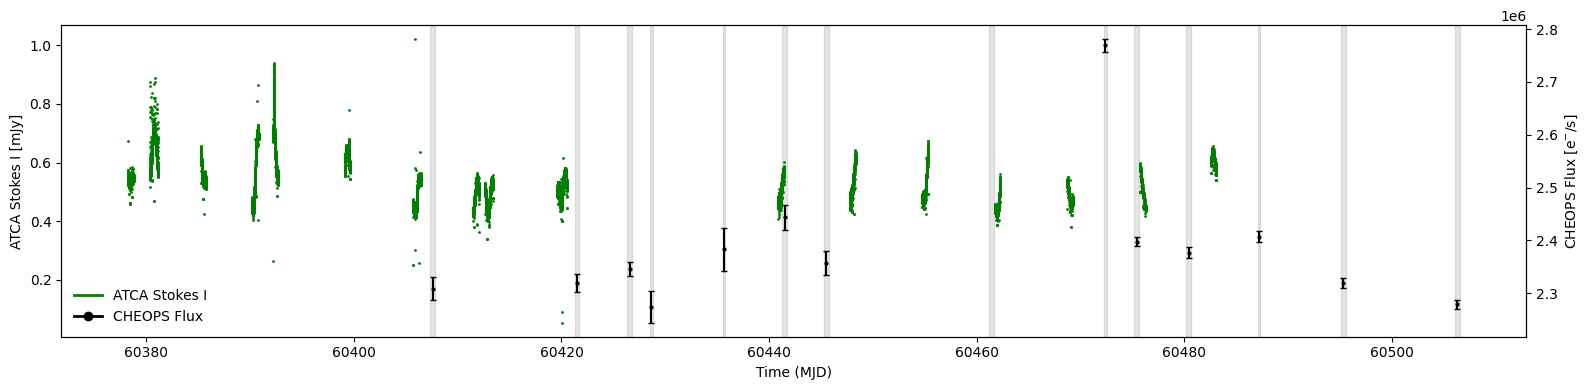

In [65]:
# plot the ranges of the ATCA observations with start_MJD and end_MJD
fig, ax1 = plt.subplots(figsize=(16,4))
for i, row in atca.iterrows():
    # plot a line for each observation
    # plt.plot([row["start_MJD"], row["end_MJD"]], [0, 0], lw=1, color="black",zorder=-10)
    # plot it in axvspan
    ax1.axvspan(row["start_MJD"], row["end_MJD"], color="black", alpha=0.1, zorder=-20)

    # plot stokes I
    ax1.errorbar((row["end_MJD"] + row["start_MJD"])/2, row["StokesI_mJy_b"]*1e3, 
                 yerr = row["sig_StokesI_mJy_b"]*1e3, color="black", zorder=-5, fmt="o", ms=2, capsize=2)

ax2 = ax1.twinx()

ax2.scatter(time, flux, color="green", s=1)

# make left y-axis scale in ppm and right y-axis in mJy
ax2.set_ylabel(r"CHEOPS Flux [e$^{-}$/s]")
ax1.set_xlabel("Time (MJD)")
ax1.set_ylabel("ATCA Stokes I [mJy]")

# make a legend for both axes, using artists 
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color="green", lw=2),
                Line2D([0], [0], color="black", marker="o", lw=2),
                ]
ax1.legend(custom_lines, ['ATCA Stokes I', 'CHEOPS Flux'], loc="lower left",
           frameon = False)



# plt.xlim(60440, 60480)
plt.tight_layout()
plt.savefig("../plots/atca_cheops.png", dpi=300)

In [24]:
atca

Run date                        11/05/2024
weekday                                Sat
start time [CEST]      2024-05-11 08:30:00
end time [CEST]        2024-05-11 20:30:00
duration [hh:mm]                  12:00:00
observer                         Ekaterina
array configuration                     6A
setup help?                            NaN
Unnamed: 8                             NaN
total_hours                           12.0
detection? yn                            y
StokesI_mJy_b                     0.000413
sig_StokesI_mJy_b                 0.000044
detection? yn.1                          n
StokesV_mJy_b                          0.0
sig_StokesV_mJy_b                 0.000012
V_I                                    0.0
Unnamed: 17                          !CA03
start_UTC              2024-05-11 06:30:00
end_UTC                2024-05-11 18:30:00
start_deltad                     35.236111
end_deltad                       35.736111
start_MJD                     60441.270833
end_MJD    